# Машинное обучение, ФКН ВШЭ

## Практическое домашнее задание 2. Градиентный спуск своими руками

### Общая информация

Дата выдачи: 30.09.2025

Мягкий дедлайн: 14.10.2025 23:59

Жесткий дедлайн: 18.10.2025 23:59


### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных модификаций градиентного спуска. В файле `descents.py` вам нужно будет реализовать несколько классов для различных вариаций градиентного спуска, а именно:
* `VanillaGradientDescent`
* `StochasticGradientDescent`
* `StochasticAverageGradient`
* `MomentumDescent`
* `Adam`

В файле `linear_regression.py` вам необходимо будет реализовать класс `LinearRegression` для обучения линейной регрессии (и, разумеется, предсказания целевой переменной на основе обученной модели).

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате **homework-practice-02-gd-Username.ipynb**, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

## Задание 1. Реализация градиентного спуска (4 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Напоминание про градиентный спуск

Основное свойство антиградиента &ndash; он указывает в сторону *наискорейшего* убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь $\eta_{k}$ обозначает длину шага на $k$-ой итерации (learning rate), а $Q(w)$ - функцию потерь (loss function).

### Градиент функции потерь MSE

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2025-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается как:

$$
    Q(w) = \frac{1}{\ell} \sum \limits_{i = 1}^\ell (y_i - \langle x_i, w \rangle)^2 = \frac{1}{\ell} \| X w - y \|^2
$$

где $\ell$ – количество объектов в выборке, $X \in \mathbb{R}^{\ell \times d}$ – матрица "объект-признак", а $y \in \mathbb{R}^\ell$ – целевая переменная. Через $x_i$ обозначается $i$-ая строчка матрицы $X$, отвечающая за $i$-й объект выборки.

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

**Решение:**

$$
    \nabla_w Q(w) = \frac{2}{\ell} X^T (Xw - y)
$$

где $\ell$ – количество объектов в выборке, $X \in \mathbb{R}^{\ell \times d}$ – матрица "объект-признак", а $y \in \mathbb{R}^\ell$ – целевая переменная.

### Задание 1.1. Learning Rate Schedules (0.03 балла)

Обратите внимание на **абстрактный** класс `LearningRateSchedule` в файле `descents.py`. С помощью него мы на каждой итерации градиентного спуска будем получать соответствующий `learning_rate` $\eta_k$.

В файле уже реализован класс `ConstantLR`, который на каждой итерации возвращает один и тот же заранее заданный шаг. Ваша задача в этом пункте – реализовать `TimeDecayLR`, который мы будем использовать для обучения линейной регрессии. Формула очередного шага должна выглядеть следующим образом:
$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

**Обратите внимание**

Все реализуемые вами классы спуска в задании - это *универсальные* оптимизаторы. Они не должны считать градиенты конкретной функции потерь внутри себя.

Для вычисления градиента они всегда обращаются к модели, с которой работают:

```
gradient = self.model.compute_gradients(X_batch, y_batch)
```

Чтобы это работало, уже на данном этапе должны быть реализованы в `linear_regression.py`:

* `compute_gradients(X, y)` для MSE (в дальнейшем, в Задании 7, сюда добавляется член L2-регуляризации),
* `compute_loss(X, y)` для MSE (аналогично с учётом L2 при необходимости).

Если идёте строго по порядку, реализуйте эти MSE-версии в начале Задания 2.1 (используя формулы из п. 1.0), а затем вернитесь к заданиям 1.2–1.6 - код оптимизаторов менять не придётся. В Задании 8 вы просто расширите обе функции под `LogCosh` и `Huber`, переключая их через `self.loss_function`.

Такой подход позволяет свободно менять функцию потерь, не переписывая алгоритмы оптимизации.

### Задание-примечание 1.1. Родительский класс BaseDescent (0 баллов).

В файле `descents.py` приведен шаблон класса `BaseDescent` – родительского класса для модификаций градиентного спуска, от которого будут наследоваться другие классы (`VanillaGradientDescent`, `StochasticGradientDescent`, `MomentumDescent` и `Adam`). Более подробно про наследование классов в Python можно прочитать
* Наследование: https://docs.python.org/3/tutorial/classes.html#inheritance
* Абстрактные классы: https://docs.python.org/3/library/abc.html

В классе `BaseDescent` **все методы уже реализованы**. Цель этого задания – внимательно ознакомиться с тем, как устроен этот класс.

Обратите внимание на атрибут `self.iteration`, отвечающий за номер итерации алгоритма спуска. Как раз с помощью него (и `self.lr_schedule`) мы и будем получать `learning_rate` на соответствующей итерации алгоритма. Функция `update_weights` должна обновлять веса модели `self.model.w`, а также возвращать величину обновления $w_{k + 1} - w_k$

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Напомним, что шаг классического градиентного спуска выглядит следующим образом:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Важно**: Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса модели `model.w`.

### Напоминание про SGD (стохастических градиентный спуск)

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов, обычно называемое **батчом**.

Оценка $\frac{1}{|B|} \sum \limits_{i \in B} \nabla_w q_i(w_k)$ называется **стохастическим градиентом** функции потерь, а получившийся метод называют методом **стохастического градиентного спуска** или просто SGD.

### Задание 1.3. Стохастический градиентный спуск StochasticGradientDescent (0.7 баллов).

Реализуйте стохастический градиентный спуск, заполнив пропуски в классе `StochasticGradientDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться **гиперпараметром** метода и передаваться в конструктор класса `__init__(...)`. Семплировать индексы батча объектов $B$ можно с повторениями (через np.random.randint) - это допустимо и даёт несмещённую оценку градиента. По желанию можно без повторений (np.random.choice(..., replace=False) или через пермутацию по эпохам).

### Напоминание про метод инерции (или метод моментов)

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация (например, в случае **стохастического градиентного спуска**). Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Stochastic Average Gradient (0.45 балла)

Держим память последних индивидуальных градиентов $g_i$ по всем объектам и их среднее $\bar g = \frac{1}{\ell}\sum_i g_i$. На каждом шаге выбираем индекс(ы) $j$ (мини-батч), заново считаем $g_j^{new}(w_k)$, обновляем среднее:
$$
\bar g \leftarrow \bar g + \frac{1}{\ell}\bigl(g_j^{new} - g_j^{old}\bigr),\qquad
w_{k+1} = w_k - \eta_k, \bar g.
$$
Инициализация: $g_i=0 \Rightarrow \bar g=0$.

Так получаем шаг почти как у полного градиента, но считаем градиент лишь на одном (или нескольких) объекте за итерацию.

Реализуйте класс `SAG` в `descents.py` с хранением `grad_memory` и `avg_grad`. Подсказка: чтобы получить пер-объектный градиент, можно вызывать `compute_gradients` на срезе из одного объекта `X[j:j+1]`.


### Задание 1.5 Метод Momentum - MomentumDescent (0.8 баллов).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ являеться гиперпараметром метода, однако в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Напоминание про AdaGrad, RMSprop и Adam

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. Идея проста: мы будем "копить" сумму квадратов градиентов и делить очередной градиент на корень из этой суммы. Таким образом, обновление весов с большими градиентами будет тормозиться, а с маленькими наоборот получать большие шаги. Формула обновлени будет выглядить так:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафиксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций (метод инерции), а также делать адаптивную длину шага по каждому параметру (`RMSProp`). Таким образом, мы получим метод `Adam` с той лишь разницей, что в методе `Adam` дополнительно делается нормировка накопленных градиентов и квадратов градиентов для устранения смещения.

### Задание 1.6. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam, заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Линейная регресия (1 балл)

### Задание 2.1. Решение методом градиентного спуска (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegressionModel**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

### Задание 2.2. Аналитическое решение (0.5 балла)

Но, как мы помним из лекции, помимо решения при помощи градиентного спуска, для ряда функций потерь можно выписать в том числе аналитическое решение. Давайте сперва вспомним, как оно выглядит для MSE. Выведите оптимальную формулу для $w$, держа в памяти формулу MSE, и дополните класс `LinearRegression`

$$\text{MSE} = \| X w - y \|^2$$
$$ w = (X^TX)^{-1}X^Ty$$

**Вопрос**: Как мы помним, у аналитического решения есть минусы, какие кстати?

**Ответ**:
1) обращение матрицы это вычислительно дорого, так как это операция кубической сложности от количества признаков
2) матрица $X^TX$ может быть вырожденной или плохо обусловленной (в этом случае обращение невозможно или ведет к неустойчивым результатам)

p.s. ответ дан с опорой на лекции

Тут мы ничего специально проверять в контесте не будем

In [63]:
import numpy as np
from linear_regression import LinearRegression

num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [64]:
import linear_regression

In [84]:
importlib.reload(linear_regression)
from linear_regression import LinearRegression


In [66]:
from sklearn.metrics import mean_squared_error as mse
import sklearn

sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MsSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MsSE 0.11181263382269922
Your MSE 0.1118126338226992


Давайте сделаем задание немного прикольнее и изменим одну из колонок. Как мы знаем, полная мультиколлинеарность запрещает нам пользоваться аналитическим решением, но `sklearn` по какой-то причине это обходит, хмм

In [67]:
x[:, 3] = x[:, 2] + x[:, 4]

In [68]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)

print("Your MSE", mse(your_linreg.predict(x), y))

Sklearn MSE 0.11447263748865462
Your MSE 0.11447263748865465


Ваша задача - понять, как можно сделать так, чтобы аналитическое решение работало всегда, вне зависимости от матрицы X. Как оказывается, это можно сделать, если воспользоваться SVD разложением, в нашем случае усеченным, чтобы было проще (это не то же самое, что обычный SVD, у него другие размерности матриц, смотрите ниже). Воспользуйтесь `scipy.sparse.linalg.svds` с числом компонент 4

Выведите формулу для w и снова дополните класс `LinearRegression`

$$\text{X} = \underset{n\times m}{\mathrm{U}} \ \underset{m\times m}{\mathrm{\Sigma}} \ \underset{m\times k}{\mathrm{V^T}}$$
$$ w =  \mathrm{V} \ \mathrm{\Sigma}^{-1} \ \mathrm{U}^T \ y$$

In [69]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer="SVD")
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.11447263748865462
Your MSE 0.11447263748865462


## Задание 3. Проверка кода (0 баллов)

Данная секция нужна для того, чтобы убедиться в правильности реализации методов спуска и класса `LinearRegression`. В начале мы сделаем небольшую локальную проверку на "адекватность" и "запускаемость" ваших моделей, после чего уже можно будет делать посылки в Яндекс Контест.

In [70]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import descents

In [99]:
importlib.reload(descents)

<module 'descents' from '/Users/isalisa/Documents/ml/hw_2_gd/descents.py'>

In [153]:
importlib.reload(linear_regression)
from linear_regression import LinearRegression

In [100]:
#%autoreload 2

from descents import (
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
)

In [74]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [60]:
isinstance(VanillaGradientDescent(), BaseDescent)

True

Проверяем код на запускаемость.

In [101]:
# Если вы реализовали не все методы спуска, то уберите лишние из списка ниже
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

max_iter = 10
tolerance = 0
num_objects = 100
dimension = 5

k = 0

for descent_model in descent_models:
    optimizer = descent_model()
    model = LinearRegression(
        optimizer=optimizer,
        tolerance=tolerance,
        max_iter=max_iter,
    )
    k += 1
    print(k)
    model.fit(x, y)
    print(len(model.loss_history), max_iter + 1)
    assert len(model.loss_history) == max_iter + 1, "Loss history failed"
    y_pred = model.predict(x)
    assert y_pred.shape == y.shape, "Prediction shape does not match target variable"

1
11 11
2
11 11
3
11 11
4
11 11
5
11 11


Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в Яндекс Контесте (чуть позже скинем ссылку).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_10%2FmQZqTbOY85&tab=submissions&submissionId=10000068-f677-7a83-9efc-f638a110fa92


* **StochasticDescent**: https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2F5uRhSAMSnW&tab=submissions&submissionId=10000068-f67e-f303-e1d1-82aba0126b42


* **SAGDescent**: https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2FzVG9mQzDO4&tab=submissions&submissionId=10000068-f67f-6697-c406-47b4b413d06c


* **MomentumDescent**: https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2FNFCAaeBVfC&tab=submissions&submissionId=10000068-f677-fc05-92cd-5a8229c239b1


* **Adam**: https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2FB1lQ7NjGgz&tab=submissions&submissionId=10000068-f678-46b0-242c-d79fb4dd5fd1


* **LinearRegression**: https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2F6PSKLrmgx8&tab=submissions&submissionId=10000068-f678-52a4-7838-ff0ea61b8264

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [104]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import (
    ConstantLR, TimeDecayLR,
    VanillaGradientDescent, StochasticGradientDescent,
    MomentumDescent, Adam,
)
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [105]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [106]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

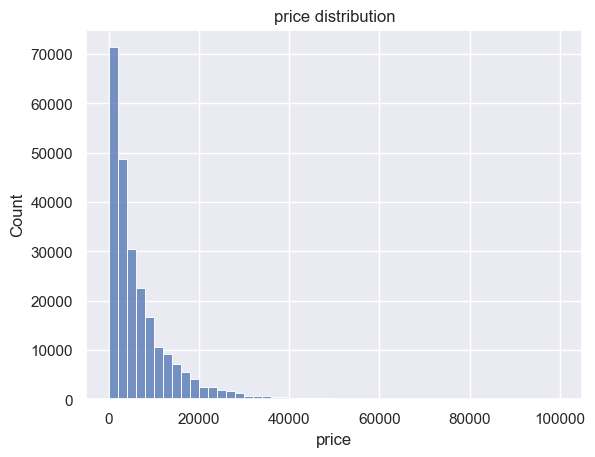

In [113]:
fig, ax = plt.subplots()
sns.histplot(data["price"], bins=50)
ax.set_title("price distribution")
plt.show()

По графику видно, что он сильно перекошен и для MSE такое распределение будет не очень хорошим, так как MSE стремится минимизировать большие ошибки, и без логарифма дорогие машины будут перетягивать модел

In [111]:
data["price_log"] = np.log1p(data["price"])

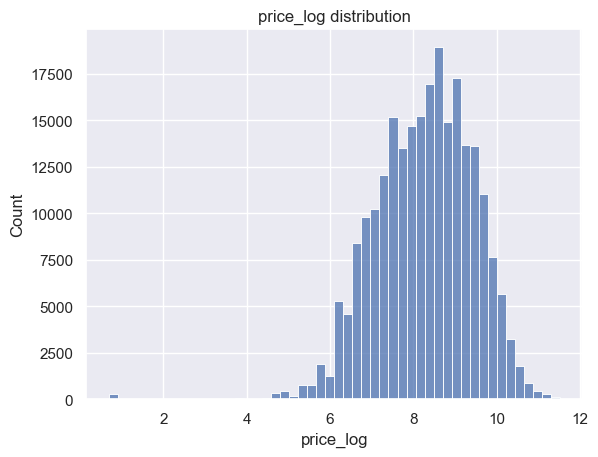

In [114]:
fig, ax = plt.subplots()
sns.histplot(data["price_log"], bins=50)
ax.set_title("price_log distribution")
plt.show()

Видны выбросы, попробуем удалить их, оставив только данные между 1 и 99 перцентилем

In [117]:
low_q  = data["price_log"].quantile(0.01)
high_q = data["price_log"].quantile(0.99)

data = data[(data["price_log"] >= low_q) & (data["price_log"] <= high_q)]

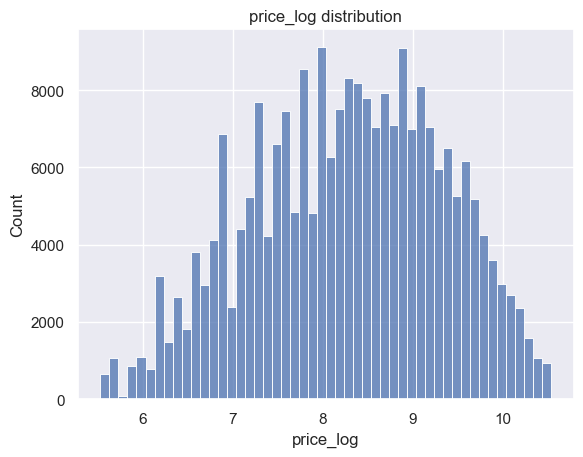

In [118]:
fig, ax = plt.subplots()
sns.histplot(data["price_log"], bins=50)
ax.set_title("price_log distribution")
plt.show()

In [119]:
data.shape

(236684, 11)

In [120]:
data.isna().sum().sort_values(ascending=False)


brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
price_log            0
dtype: int64

Пропусков нет, повезло

In [107]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

Разделите признаки на категориальные, числовые и ... все остальное

In [108]:
categorical = ["brand", "model", "vehicleType", "gearbox", "fuelType", "notRepairedDamage"]
numeric = ["powerPS", "kilometer", "autoAgeMonths"]
other = []

# YOUR CODE (EDA):

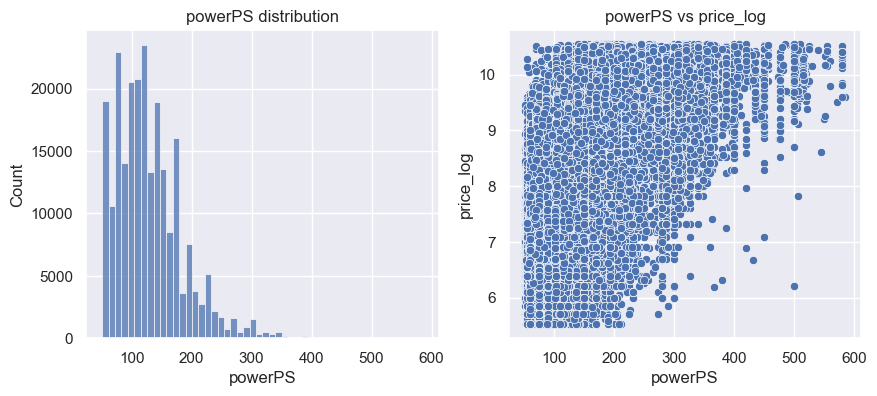

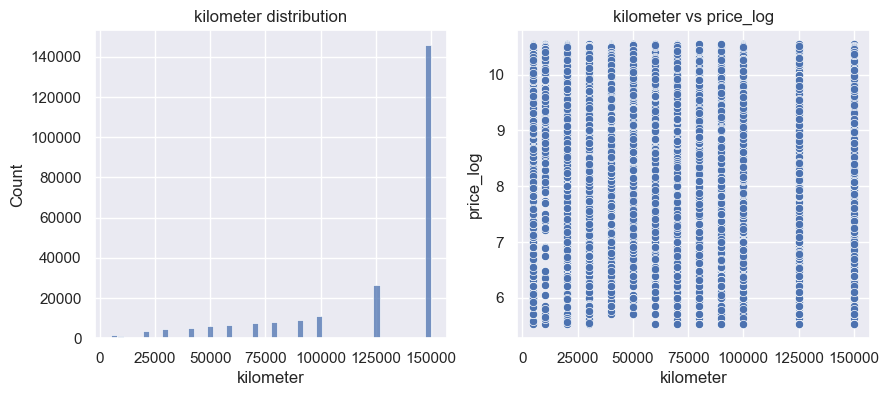

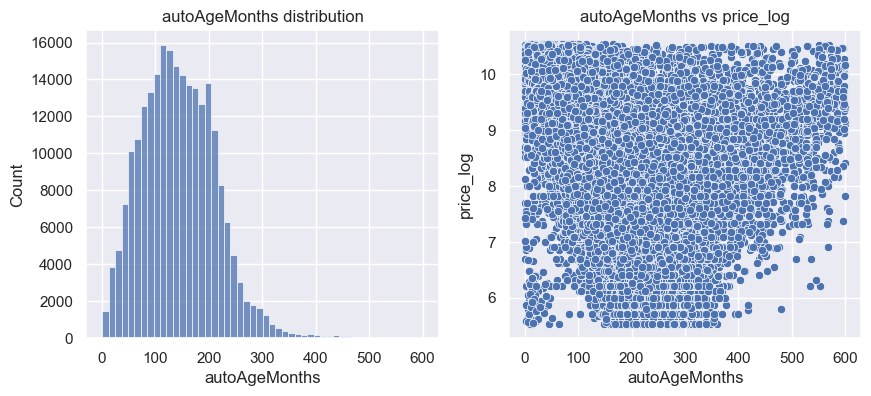

In [122]:
for col in numeric:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(data[col], bins=50, ax=ax[0])
    ax[0].set_title(f"{col} distribution")

    sns.scatterplot(x=data[col], y=data["price_log"], ax=ax[1])
    ax[1].set_title(f"{col} vs price_log")

    plt.show()

У всех переменных из числовых есь зависимость с таргетом и будет полезно их оставить, однако PowerPs скошен вправо, лучше удалить выбросы и прологарифмировать, также удалим выбросы у autoAgeMonths, kilometer ступенчатый, оставим, как есть



In [130]:
low_q  = data["powerPS"].quantile(0.01)
high_q = data["powerPS"].quantile(0.99)

data = data[(data["powerPS"] >= low_q) & (data["powerPS"] <= high_q)]

In [131]:
low_q  = data["autoAgeMonths"].quantile(0.01)
high_q = data["autoAgeMonths"].quantile(0.99)

data = data[(data["autoAgeMonths"] >= low_q) & (data["autoAgeMonths"] <= high_q)]

In [ ]:
data["powerPS_log"] = np.log1p(data["powerPS"])

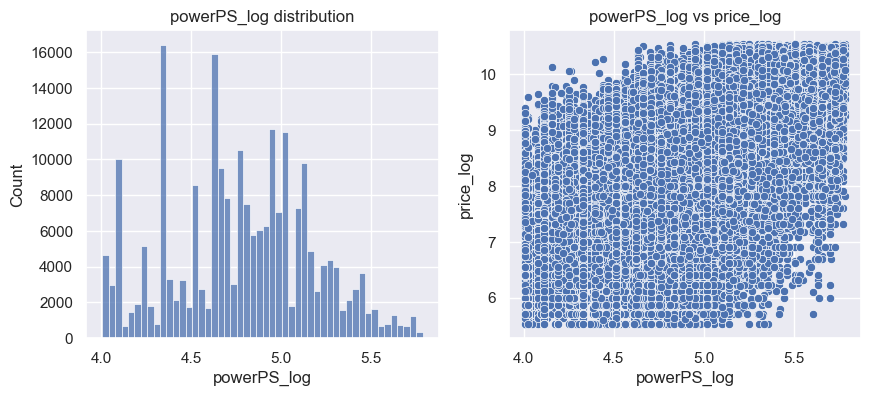

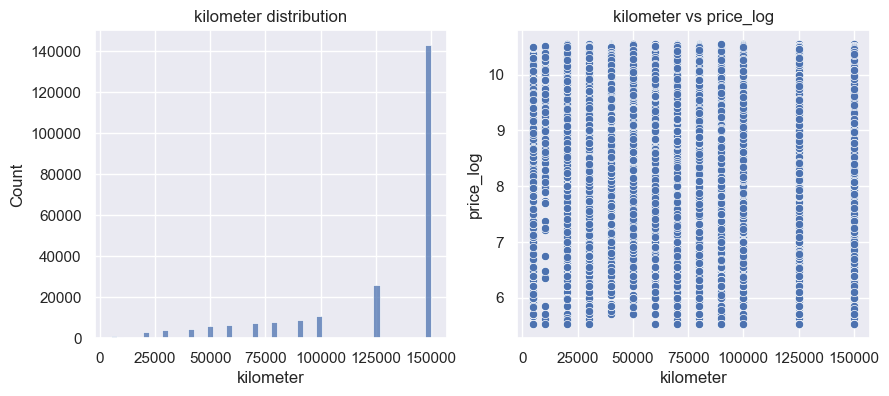

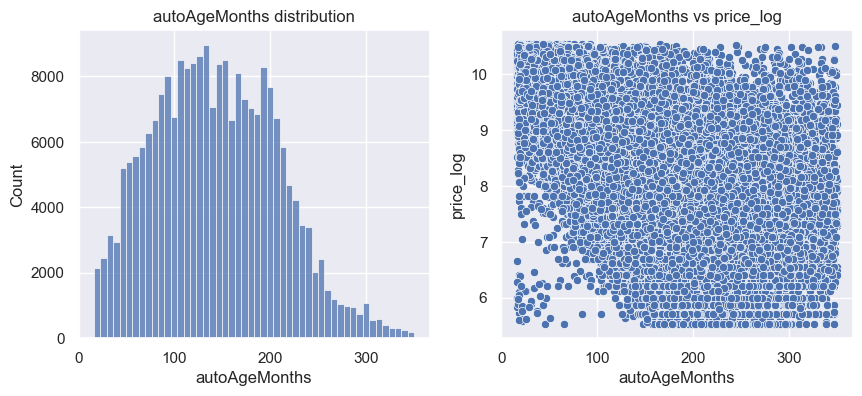

In [136]:
for col in ["powerPS_log", "kilometer", "autoAgeMonths"]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(data[col], bins=50, ax=ax[0])
    ax[0].set_title(f"{col} distribution")

    sns.scatterplot(x=data[col], y=data["price_log"], ax=ax[1])
    ax[1].set_title(f"{col} vs price_log")

    plt.show()

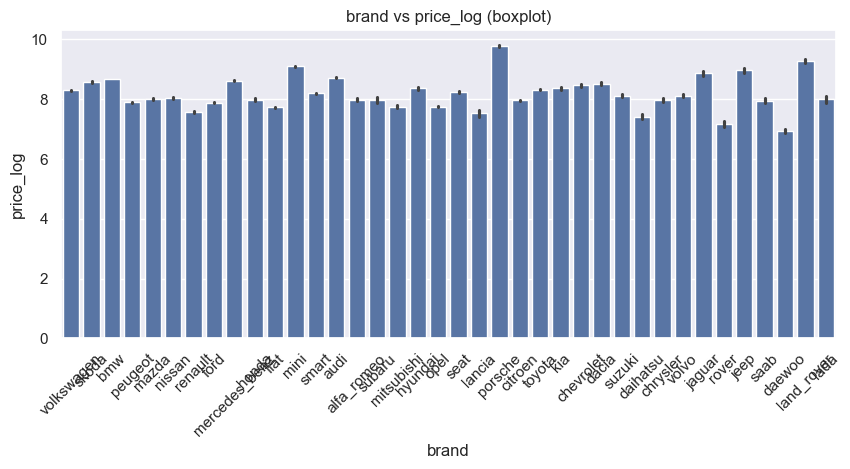

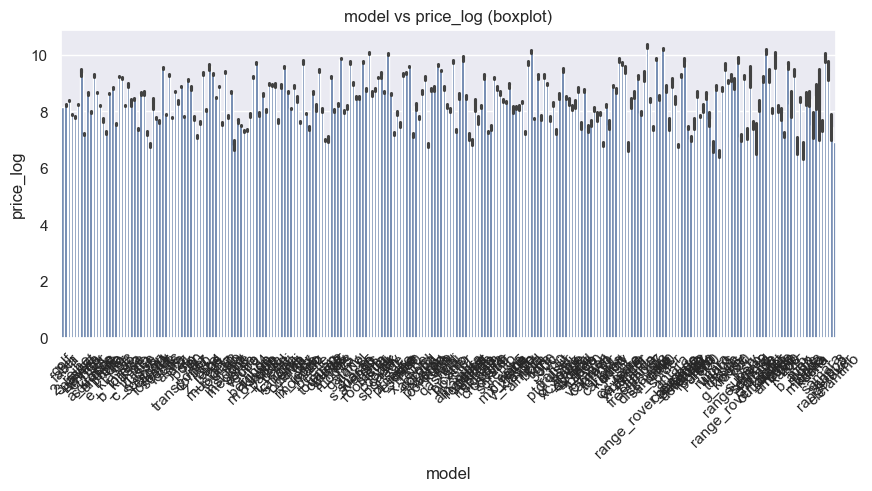

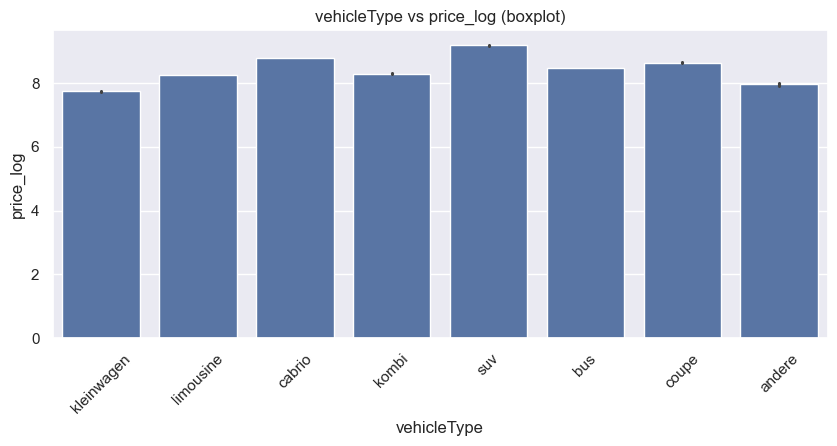

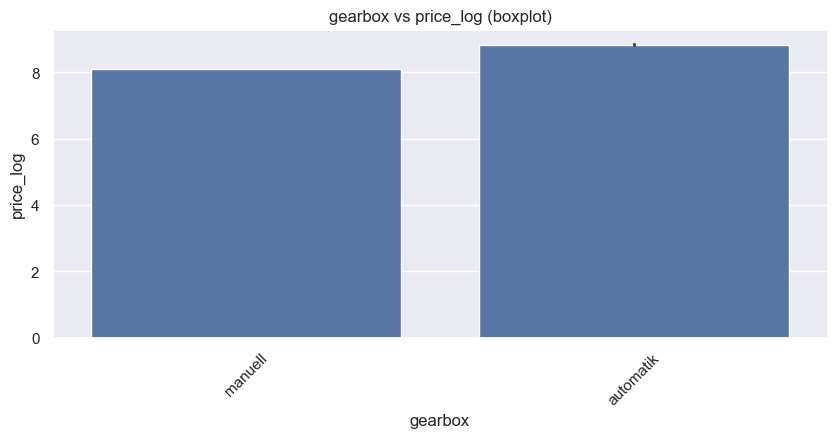

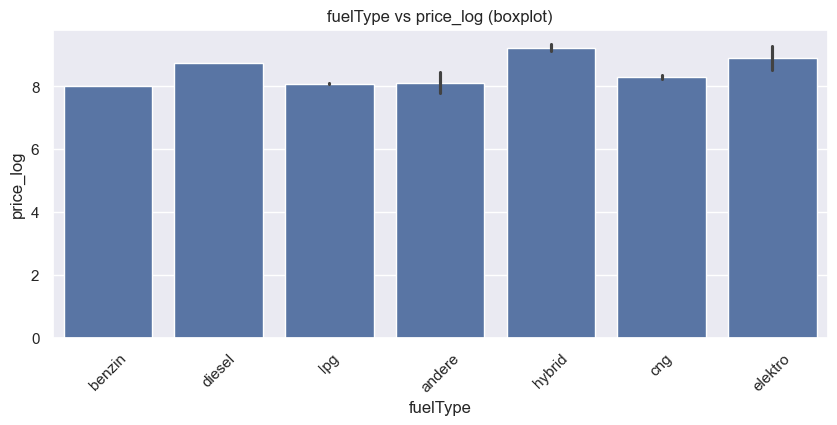

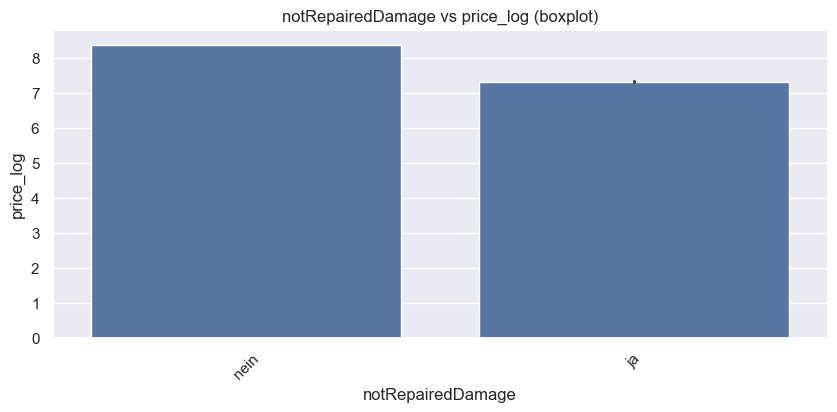

In [124]:
for col in categorical:
    plt.figure(figsize=(10, 4))
    #sns.boxplot(x=data[col], y=data["price_log"])
    sns.barplot(x=data[col], y=data["price_log"], estimator=np.mean)

    plt.title(f"{col} vs price_log (boxplot)")
    plt.xticks(rotation=45)
    plt.show()

notRepairedDamage и gearbox это просто бинарные признаки, перекодируем их, масштабировать их не нужно

In [137]:
data["is_automatik"] = data["gearbox"].map({"automatik": 1, "manuell": 0})
data["notRepairedDamage"] = data["notRepairedDamage"].map({"nein": 0, "ja": 1})


В признак model слишком много возможных значений - 248, это сильно раздует матрицу при OHE. Редкие модели скорее будт зашумлять модель. Оставим только 20 самых популярных моделей, остальные назовем - other

In [125]:
data["model"].nunique()


248

In [129]:
model_counts = data["model"].value_counts()
model_counts.head(20)


model
golf           19871
andere         17642
3er            14892
a4              7532
passat          7199
astra           7057
polo            6774
corsa           6680
5er             6549
c_klasse        6511
e_klasse        5577
a3              4811
a6              4508
focus           4211
transporter     3679
2_reihe         3663
1er             3295
fiesta          3268
a_klasse        2927
twingo          2624
Name: count, dtype: int64

In [138]:
top_models = model_counts.head(20).index

In [139]:
data["model"] = data["model"].where(data["model"].isin(top_models), "other")


In [140]:
data["model"].value_counts()

model
other          94168
golf           19289
andere         15550
3er            14742
a4              7477
passat          7151
astra           7027
polo            6670
corsa           6615
5er             6450
c_klasse        6441
e_klasse        5372
a3              4684
a6              4447
focus           4141
2_reihe         3648
transporter     3601
1er             3216
fiesta          3192
a_klasse        2912
twingo          2584
Name: count, dtype: int64

In [141]:
categorical = ["brand", "model", "vehicleType", "fuelType"]
numeric = ["powerPS_log", "kilometer", "autoAgeMonths"]
other = ["is_automatik", "notRepairedDamage"]

Добавляем в данные единичную колонку `bias`, чтобы не делать отдельные параметр $b$ для свободного члена модели.

In [ ]:
data['bias'] = 1
other += ['bias']

In [144]:
x = data[categorical + numeric + other]
y = data['price_log']

А также сделаем базовую обработку данных, а именно:
* Применим `OneHotEncoding` к категориальным признакам
* Стандартизуем численные признаки с помощью `StandardScaler`
* Остальные признаки трогать не будем, т.к. с ними непонятно что делать

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

Теперь вам необходимо разбить данные на обучающую, тестовую и валидационную выборки:

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

## Задание 5. Сравнение методов градиентного спуска (1.5 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.75 балла)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [166]:
from sklearn.metrics import r2_score
import numpy as np

descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam,
]

lambdas = np.logspace(-4, 0, 10)

max_iter  = 2000
tolerance = 1e-7

results = []
steps =[]

batch_params = {
    "StochasticGradientDescent": {"batch_size": 1000},
    "SAGDescent": {"batch_size": 1000},
}

k = 0
for descent_model in descent_models:
    model_name = descent_model.__name__
    best_lambda = None
    best_r2_val = -np.inf
    best_iters  = None

    print(f"--- {model_name} ---")
    for lam in lambdas:
        optimizer = descent_model(
            lr_schedule=lambda: TimeDecayLR(lambda_=lam),
            **batch_params.get(model_name, {})
            )

        model = LinearRegression(
            optimizer=optimizer,
            tolerance=tolerance,
            max_iter=max_iter,
        )

        model.fit(X_train, y_train)

        y_val_pred = model.predict(X_val)
        r2_val = r2_score(y_val, y_val_pred)

        if r2_val > best_r2_val:
            best_r2_val = r2_val
            best_lambda = lam
            best_iters = len(model.loss_history)
        
        steps.append({
            "method": model_name,
            "best_lambda": lam,
            "best_R2_val": r2_val,
            "iters": len(model.loss_history),
        })

        print(f"  λ={lam:.4f} --  R2={r2_val:.4f}")

    results.append({
        "method": model_name,
        "best_lambda": best_lambda,
        "best_R2_val": best_r2_val,
        "iters": best_iters,
    })



--- VanillaGradientDescent ---
  λ=0.0001 --  R2=-61.0309
  λ=0.0003 --  R2=-56.4294
  λ=0.0008 --  R2=-35.2710
  λ=0.0022 --  R2=-12.7172
  λ=0.0060 --  R2=-0.6932
  λ=0.0167 --  R2=0.2606
  λ=0.0464 --  R2=0.5972
  λ=0.1292 --  R2=0.7477
  λ=0.3594 --  R2=0.8032
  λ=1.0000 --  R2=0.8204
--- StochasticGradientDescent ---
  λ=0.0001 --  R2=-61.0389
  λ=0.0003 --  R2=-56.4402
  λ=0.0008 --  R2=-35.3692
  λ=0.0022 --  R2=-12.7207
  λ=0.0060 --  R2=-0.6923
  λ=0.0167 --  R2=0.2505
  λ=0.0464 --  R2=0.5871
  λ=0.1292 --  R2=0.7506
  λ=0.3594 --  R2=0.8067
  λ=1.0000 --  R2=0.8168
--- SAGDescent ---
  λ=0.0001 --  R2=-61.7331
  λ=0.0003 --  R2=-61.7326
  λ=0.0008 --  R2=-61.7312
  λ=0.0022 --  R2=-61.7274
  λ=0.0060 --  R2=-1.2776
  λ=0.0167 --  R2=0.2328
  λ=0.0464 --  R2=0.5763
  λ=0.1292 --  R2=0.7433
  λ=0.3594 --  R2=0.7988
  λ=1.0000 --  R2=0.8194
--- MomentumDescent ---
  λ=0.0001 --  R2=-29.6182
  λ=0.0003 --  R2=-7.9375
  λ=0.0008 --  R2=-0.1497
  λ=0.0022 --  R2=0.3514
  λ=0.0060 

In [169]:
results_df = pd.DataFrame(results)

results_df = results_df.sort_values("best_R2_val", ascending=False)

results_df

,method,best_lambda,best_R2_val,iters
4,Adam,1.0,0.828334,415
3,MomentumDescent,1.0,0.828269,1036
0,VanillaGradientDescent,1.0,0.820366,1361
2,SAGDescent,1.0,0.819364,1834
1,StochasticGradientDescent,1.0,0.816826,2001


In [170]:
steps_df = pd.DataFrame(steps)

steps_df = steps_df.sort_values("best_R2_val", ascending=False)

steps_df.head()

,method,best_lambda,best_R2_val,iters
49,Adam,1.000000,0.828334,415
48,Adam,0.359381,0.828275,755
39,MomentumDescent,1.000000,0.828269,1036
47,Adam,0.129155,0.827731,1687
38,MomentumDescent,0.359381,0.827111,1427


### Задание 5.2. Сравнение методов (0.75 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

,method,lambda,R2_train,R2_val,R2_test
4,Adam,1.0,0.827802,0.828334,0.833795
3,MomentumDescent,1.0,0.827394,0.828269,0.833425
0,VanillaGradientDescent,1.0,0.819478,0.820366,0.825175
2,SAGDescent,1.0,0.818740,0.819607,0.824408
1,StochasticGradientDescent,1.0,0.772213,0.774827,0.778287


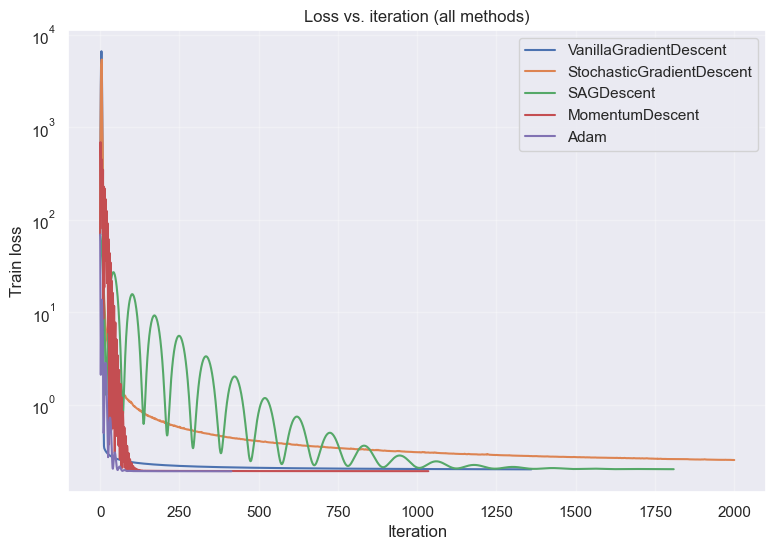

In [ ]:
import inspect
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

best_lmbd = {row["method"]: row["best_lambda"] for row in results}

max_iter  = 2000
tolerance = 1e-7

batch_kwargs = {
    "StochasticGradientDescent": {"batch_size": 64},
    "SAGDescent": {"batch_size": 1024},
}

histories = {}
metrics_table = []

for Descent in descent_models:
    name = Descent.__name__
    lam  = float(best_lmbd[name])

    kwargs = {"lr_schedule": (lambda lam=lam: TimeDecayLR(lambda_=lam))}
    if "batch_size" in inspect.signature(Descent).parameters:
        kwargs.update(batch_kwargs.get(name, {}))

    opt = Descent(**kwargs)

    model = LinearRegression(
        optimizer=opt,
        max_iter=max_iter,
        tolerance=tolerance,
    )

    model.fit(X_train, y_train)
    histories[name] = np.array(model.loss_history, dtype=float)

    y_tr_pred = model.predict(X_train)
    y_va_pred = model.predict(X_val)
    r2_tr = r2_score(y_train, y_tr_pred)
    r2_va = r2_score(y_val, y_va_pred)

    row = {"method": name, "lambda": lam, "R2_train": r2_tr, "R2_val": r2_va}

    y_te_pred = model.predict(X_test)
    row["R2_test"] = r2_score(y_test, y_te_pred)

    metrics_table.append(row)

display(pd.DataFrame(metrics_table).sort_values("R2_val", ascending=False))


plt.figure(figsize=(9, 6))
for name, hist in histories.items():
    plt.plot(range(len(hist)), hist, label=name)
plt.xlabel("Iteration")
plt.ylabel("Train loss")
plt.yscale("log")
plt.title("Loss vs. iteration (all methods)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
